<a href="https://colab.research.google.com/github/PedroHenrique726/Projeto-de-IA---Aplicando-a-Logica-Difusa/blob/main/Projeto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto A3 - Inteligência Artificial**

**Proposta:**
Utilizar a Lógica Fuzzy para auxiliar a identificação da qualidade da água.

# **Instalação e importação de bibliotecas:**
matplotlib.pyplot: Biblioteca utilizada para visualização de dados em formato de gráficos 2D. \
numpy: Biblioteca para a linguagem Python com funções para se trabalhar com computação numérica. \
skfuzzy: Parte da bibliteca "Scikit-learn" que é utilizada para Machine Learning.

In [ ]:
!pip install -U scikit-fuzzy
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Váriaveis**
**Foi escolhido 4 variáveis de entrada para esta proposta:** 

PH: “PH” \
Coliformes Fecais: “col” \
% de saturação do Oxigênio dissolvido: “od” \
Variação de temperatura: "temp" \
 \

**E a variável de saída:**

Potabilidade: “pota”

O *RANGE* de cada variável foi definido de acordo com suas características. 

In [ ]:
#Variavel de entrada
ph = ctrl.Antecedent(np.arange(1, 14, 0.5), "PH")
col  = ctrl.Antecedent(np.arange(0, 7, 0.1), "Coliformes")
od = ctrl.Antecedent(np.arange(0, 140, 1), "% de Saturação de Oxigênio Dissolvido")
temp = ctrl.Antecedent(np.arange(-5,16, 0.5), "Variação da temperatura")

#Variavel de saida
pota = ctrl.Consequent(np.arange(0, 101, 0.5), "Potabilidade")

# **Fuzzificação**
O processo de fuzzificação consiste em converter valores numéricos em conjuntos nebulosos. Esta conversão é feita usando-se as funções de pertinência. Para cada uma das variáveis escolhidas foi atribuída um universo de discurso  de acordo com suas características e impondo regiões difusas. 

In [ ]:
#fuzzificação

#Variaveis de entrada
ph['altamente ácido'] = fuzz.trapmf(ph.universe, [0, 0, 2, 4])
ph['ácido'] = fuzz.trimf(ph.universe, [3, 5, 7])
ph['ideal'] = fuzz.trapmf(ph.universe, [6,7, 9, 10])
ph['acima do ideal'] = fuzz.trapmf(ph.universe, [8.5, 11, 14, 14])  

col['otima'] = fuzz.trapmf(col.universe, [0, 0, 1, 2])
col['boa'] = fuzz.trimf(col.universe, [1.5, 2, 3])
col['regular'] = fuzz.trimf(col.universe, [2, 3, 4])
col['ruim'] = fuzz.trimf(col.universe, [3.5, 4.5, 5.5])
col['pessima'] = fuzz.trapmf(col.universe, [4.5, 6, 7, 7])

od['muito baixa'] = fuzz.trapmf(od.universe, [0, 0, 40, 50])
od['baixa'] = fuzz.trapmf(od.universe, [45, 60, 80, 95])
od['boa'] = fuzz.trimf(od.universe, [90, 100, 110])
od['supersaturado'] = fuzz.trapmf(od.universe, [105, 115, 150, 150])  

temp['muito elevada'] = fuzz.trapmf(temp.universe, [7, 11, 17, 17])
temp['elevada'] = fuzz.trimf(temp.universe, [1, 5, 9])
temp['baixa'] = fuzz.trapmf(temp.universe, [-6,-6, -2, -0.5])
temp['minima'] = fuzz.trapmf(temp.universe, [-2.5,-1, 1, 2.5])

#Variaveis de saida
pota['pessima'] = fuzz.trapmf(pota.universe, [0, 0, 20, 25])
pota['ruim'] = fuzz.trimf(pota.universe, [15, 28.5, 40])
pota['regular'] = fuzz.trimf(pota.universe, [30, 42.6, 55])
pota['boa'] = fuzz.trimf(pota.universe, [50, 70, 90])
pota['otima'] = fuzz.trapmf(pota.universe, [80, 90, 102, 102])


# **Regras**
As regras do sistema de inferência fuzzy representam as relações entre suas entradas e suas saídas, formando a base de conhecimento. 
Regras são definidas seguindo o padrão: SE condição ENTÃO conclusão, com variáveis linguísticas (Fuzzy)
Cada regra descrita abaixo foi estabelecida de acordo com os padrões de qualidade mínimo necessário para consumo de água.


In [ ]:
#definindo as regras../../
regra1 = ctrl.Rule(ph['ideal'] & col['otima'] & od['boa'] & temp['minima'], pota['otima'])
regra2 = ctrl.Rule(ph['ideal'] & col['otima'] & od['boa'] & temp['baixa'], pota['otima'])
regra3 = ctrl.Rule(ph['ideal'] & col['otima'] & od['boa'] & temp['elevada'], pota['regular'])
regra4 = ctrl.Rule(ph['ideal'] & col['otima'] & od['supersaturado'] & temp['minima'], pota['otima'])
regra5 = ctrl.Rule(ph['ideal'] & col['otima'] & od['supersaturado'] & temp['baixa'], pota['regular'])
regra6 = ctrl.Rule(ph['ideal'] & col['otima'] & od['supersaturado'] & temp['elevada'], pota['regular'])
regra7 = ctrl.Rule(ph['ideal'] & col['otima'] & od['baixa'] & temp['minima'], pota['boa'])
regra8 = ctrl.Rule(ph['ideal'] & col['otima'] & od['baixa'] & temp['baixa'], pota['boa'])
regra9 = ctrl.Rule(ph['ideal'] & col['otima'] & od['baixa'] & temp['elevada'], pota['ruim'])
regra10 = ctrl.Rule(ph['ideal'] & col['boa'] & od['boa'] & temp['minima'], pota['boa'])
regra11 = ctrl.Rule(ph['ideal'] & col['boa'] & od['boa'] & temp['baixa'], pota['regular'])
regra12 = ctrl.Rule(ph['ideal'] & col['boa'] & od['boa'] & temp['elevada'], pota['regular'])
regra13 = ctrl.Rule(ph['ideal'] & col['boa'] & od['supersaturado'] & temp['minima'], pota['regular'])
regra14 = ctrl.Rule(ph['ideal'] & col['boa'] & od['supersaturado'] & temp['baixa'], pota['regular'])
regra15 = ctrl.Rule(ph['ideal'] & col['boa'] & od['supersaturado'] & temp['elevada'], pota['ruim'])
regra16 = ctrl.Rule(ph['ideal'] & col['boa'] & od['baixa'] & temp['minima'], pota['boa'])
regra17 = ctrl.Rule(ph['ideal'] & col['boa'] & od['baixa'] & temp['baixa'], pota['regular'])
regra18 = ctrl.Rule(ph['ideal'] & col['boa'] & od['baixa'] & temp['elevada'], pota['ruim'])
regra19 = ctrl.Rule(ph['ideal'] & col['regular'] & od['boa'] & temp['minima'], pota['regular'])
regra20 = ctrl.Rule(ph['ideal'] & col['regular'] & od['boa'] & temp['baixa'], pota['regular'])
regra21 = ctrl.Rule(ph['ideal'] & col['regular'] & od['boa'] & temp['elevada'], pota['ruim'])
regra22 = ctrl.Rule(ph['ideal'] & col['regular'] & od['supersaturado'] & temp['minima'], pota['regular'])
regra23 = ctrl.Rule(ph['ideal'] & col['regular'] & od['supersaturado'] & temp['baixa'], pota['ruim'])
regra24 = ctrl.Rule(ph['ideal'] & col['regular'] & od['supersaturado'] & temp['elevada'], pota['ruim'])
regra25 = ctrl.Rule(ph['ideal'] & col['regular'] & od['baixa'] & temp['minima'], pota['regular'])
regra26 = ctrl.Rule(ph['ideal'] & col['regular'] & od['baixa'] & temp['baixa'], pota['regular'])
regra27 = ctrl.Rule(ph['ideal'] & col['regular'] & od['baixa'] & temp['elevada'], pota['ruim'])
regra28 = ctrl.Rule(ph['ideal'] & col['ruim'] & od['boa'] & temp['minima'], pota['regular'])
regra29 = ctrl.Rule(ph['ideal'] & col['ruim'] & od['boa'] & temp['baixa'], pota['ruim'])
regra30 = ctrl.Rule(ph['ideal'] & col['ruim'] & od['boa'] & temp['elevada'], pota['ruim'])
regra31 = ctrl.Rule(ph['ideal'] & col['ruim'] & od['supersaturado'] & temp['minima'], pota['ruim'])
regra32 = ctrl.Rule(ph['ideal'] & col['ruim'] & od['supersaturado'] & temp['baixa'], pota['ruim'])
regra33 = ctrl.Rule(ph['ideal'] & col['ruim'] & od['supersaturado'] & temp['elevada'], pota['ruim'])
regra34 = ctrl.Rule(ph['ideal'] & col['ruim'] & od['baixa'] & temp['minima'], pota['ruim'])
regra35 = ctrl.Rule(ph['ideal'] & col['ruim'] & od['baixa'] & temp['baixa'], pota['ruim'])
regra36 = ctrl.Rule(ph['ideal'] & col['ruim'] & od['baixa'] & temp['elevada'], pota['ruim'])
regra37 = ctrl.Rule(ph['acima do ideal'] & col['otima'] & od['boa'] & temp['minima'], pota['boa'])
regra38 = ctrl.Rule(ph['acima do ideal'] & col['otima'] & od['boa'] & temp['baixa'], pota['regular'])
regra39 = ctrl.Rule(ph['acima do ideal'] & col['otima'] & od['boa'] & temp['elevada'], pota['regular'])
regra40 = ctrl.Rule(ph['acima do ideal'] & col['otima'] & od['supersaturado'] & temp['minima'], pota['regular'])
regra41 = ctrl.Rule(ph['acima do ideal'] & col['otima'] & od['supersaturado'] & temp['baixa'], pota['regular'])
regra42 = ctrl.Rule(ph['acima do ideal'] & col['otima'] & od['supersaturado'] & temp['elevada'], pota['ruim'])
regra43 = ctrl.Rule(ph['acima do ideal'] & col['otima'] & od['baixa'] & temp['minima'], pota['boa'])
regra44 = ctrl.Rule(ph['acima do ideal'] & col['otima'] & od['baixa'] & temp['baixa'], pota['regular'])
regra45 = ctrl.Rule(ph['acima do ideal'] & col['otima'] & od['baixa'] & temp['elevada'], pota['ruim'])
regra46 = ctrl.Rule(ph['acima do ideal'] & col['boa'] & od['boa'] & temp['minima'], pota['regular'])
regra47 = ctrl.Rule(ph['acima do ideal'] & col['boa'] & od['boa'] & temp['baixa'], pota['regular'])
regra48 = ctrl.Rule(ph['acima do ideal'] & col['boa'] & od['boa'] & temp['elevada'], pota['ruim'])
regra49 = ctrl.Rule(ph['acima do ideal'] & col['boa'] & od['supersaturado'] & temp['minima'], pota['regular'])
regra50 = ctrl.Rule(ph['acima do ideal'] & col['boa'] & od['supersaturado'] & temp['baixa'], pota['ruim'])
regra51 = ctrl.Rule(ph['acima do ideal'] & col['boa'] & od['supersaturado'] & temp['elevada'], pota['ruim'])
regra52 = ctrl.Rule(ph['acima do ideal'] & col['boa'] & od['baixa'] & temp['minima'], pota['regular'])
regra53 = ctrl.Rule(ph['acima do ideal'] & col['boa'] & od['baixa'] & temp['baixa'], pota['ruim'])
regra54 = ctrl.Rule(ph['acima do ideal'] & col['boa'] & od['baixa'] & temp['elevada'], pota['ruim'])
regra55 = ctrl.Rule(ph['acima do ideal'] & col['regular'] & od['boa'] & temp['minima'], pota['regular'])
regra56 = ctrl.Rule(ph['acima do ideal'] & col['regular'] & od['boa'] & temp['baixa'], pota['ruim'])
regra57 = ctrl.Rule(ph['acima do ideal'] & col['regular'] & od['boa'] & temp['elevada'], pota['ruim'])
regra58 = ctrl.Rule(ph['acima do ideal'] & col['regular'] & od['supersaturado'] & temp['minima'], pota['ruim'])
regra59 = ctrl.Rule(ph['acima do ideal'] & col['regular'] & od['supersaturado'] & temp['baixa'], pota['ruim'])
regra60 = ctrl.Rule(ph['acima do ideal'] & col['regular'] & od['supersaturado'] & temp['elevada'], pota['ruim'])
regra61 = ctrl.Rule(ph['acima do ideal'] & col['regular'] & od['baixa'] & temp['minima'], pota['regular'])
regra62 = ctrl.Rule(ph['acima do ideal'] & col['regular'] & od['baixa'] & temp['baixa'], pota['ruim'])
regra63 = ctrl.Rule(ph['acima do ideal'] & col['regular'] & od['baixa'] & temp['elevada'], pota['ruim'])
regra64 = ctrl.Rule(ph['acima do ideal'] & col['ruim'] & od['boa'] & temp['minima'], pota['ruim'])
regra65 = ctrl.Rule(ph['acima do ideal'] & col['ruim'] & od['boa'] & temp['baixa'], pota['ruim'])
regra66 = ctrl.Rule(ph['acima do ideal'] & col['ruim'] & od['boa'] & temp['elevada'], pota['ruim'])
regra67 = ctrl.Rule(ph['acima do ideal'] & col['ruim'] & od['supersaturado'] & temp['minima'], pota['ruim'])
regra68 = ctrl.Rule(ph['acima do ideal'] & col['ruim'] & od['supersaturado'] & temp['baixa'], pota['ruim'])
regra69 = ctrl.Rule(ph['acima do ideal'] & col['ruim'] & od['supersaturado'] & temp['elevada'], pota['ruim'])
regra70 = ctrl.Rule(ph['acima do ideal'] & col['ruim'] & od['baixa'] & temp['minima'], pota['ruim'])
regra71 = ctrl.Rule(ph['acima do ideal'] & col['ruim'] & od['baixa'] & temp['baixa'], pota['ruim'])
regra72 = ctrl.Rule(ph['acima do ideal'] & col['ruim'] & od['baixa'] & temp['elevada'], pota['ruim'])
regra73 = ctrl.Rule(ph['ácido'] & col['otima'] & od['boa'] & temp['minima'], pota['regular'])
regra74 = ctrl.Rule(ph['ácido'] & col['otima'] & od['boa'] & temp['baixa'], pota['regular'])
regra75 = ctrl.Rule(ph['ácido'] & col['otima'] & od['boa'] & temp['elevada'], pota['ruim'])
regra76 = ctrl.Rule(ph['ácido'] & col['otima'] & od['supersaturado'] & temp['minima'], pota['regular'])
regra77 = ctrl.Rule(ph['ácido'] & col['otima'] & od['supersaturado'] & temp['baixa'], pota['ruim'])
regra78 = ctrl.Rule(ph['ácido'] & col['otima'] & od['supersaturado'] & temp['elevada'], pota['ruim'])
regra79 = ctrl.Rule(ph['ácido'] & col['otima'] & od['baixa'] & temp['minima'], pota['regular'])
regra80 = ctrl.Rule(ph['ácido'] & col['otima'] & od['baixa'] & temp['baixa'], pota['ruim'])
regra81 = ctrl.Rule(ph['ácido'] & col['otima'] & od['baixa'] & temp['elevada'], pota['ruim'])
regra82 = ctrl.Rule(ph['ácido'] & col['boa'] & od['boa'] & temp['minima'], pota['regular'])
regra83 = ctrl.Rule(ph['ácido'] & col['boa'] & od['boa'] & temp['baixa'], pota['ruim'])
regra84 = ctrl.Rule(ph['ácido'] & col['boa'] & od['boa'] & temp['elevada'], pota['ruim'])
regra85 = ctrl.Rule(ph['ácido'] & col['boa'] & od['supersaturado'] & temp['minima'], pota['ruim'])
regra86 = ctrl.Rule(ph['ácido'] & col['boa'] & od['supersaturado'] & temp['baixa'], pota['ruim'])
regra87 = ctrl.Rule(ph['ácido'] & col['boa'] & od['supersaturado'] & temp['elevada'], pota['ruim'])
regra88 = ctrl.Rule(ph['ácido'] & col['boa'] & od['baixa'] & temp['minima'], pota['regular'])
regra89 = ctrl.Rule(ph['ácido'] & col['boa'] & od['baixa'] & temp['baixa'], pota['ruim'])
regra90 = ctrl.Rule(ph['ácido'] & col['boa'] & od['baixa'] & temp['elevada'], pota['ruim'])
regra91 = ctrl.Rule(ph['ácido'] & col['regular'] & od['boa'] & temp['minima'], pota['ruim'])
regra92 = ctrl.Rule(ph['ácido'] & col['regular'] & od['boa'] & temp['baixa'], pota['ruim'])
regra93 = ctrl.Rule(ph['ácido'] & col['regular'] & od['boa'] & temp['elevada'], pota['ruim'])
regra94 = ctrl.Rule(ph['ácido'] & col['regular'] & od['supersaturado'] & temp['minima'], pota['ruim'])
regra95 = ctrl.Rule(ph['ácido'] & col['regular'] & od['supersaturado'] & temp['baixa'], pota['ruim'])
regra96 = ctrl.Rule(ph['ácido'] & col['regular'] & od['supersaturado'] & temp['elevada'], pota['ruim'])
regra97 = ctrl.Rule(ph['ácido'] & col['regular'] & od['baixa'] & temp['minima'], pota['regular'])
regra98 = ctrl.Rule(ph['ácido'] & col['regular'] & od['baixa'] & temp['baixa'], pota['ruim'])
regra99 = ctrl.Rule(ph['ácido'] & col['regular'] & od['baixa'] & temp['elevada'], pota['ruim'])
regra100 = ctrl.Rule(ph['ácido'] & col['ruim'] & od['boa'] & temp['minima'], pota['ruim'])
regra101 = ctrl.Rule(ph['ácido'] & col['ruim'] & od['boa'] & temp['baixa'], pota['ruim'])
regra102 = ctrl.Rule(ph['ácido'] & col['ruim'] & od['boa'] & temp['elevada'], pota['ruim'])
regra103 = ctrl.Rule(ph['ácido'] & col['ruim'] & od['supersaturado'] & temp['minima'], pota['ruim'])
regra104 = ctrl.Rule(ph['ácido'] & col['ruim'] & od['supersaturado'] & temp['baixa'], pota['ruim'])
regra105 = ctrl.Rule(ph['ácido'] & col['ruim'] & od['supersaturado'] & temp['elevada'], pota['ruim'])
regra106 = ctrl.Rule(ph['ácido'] & col['ruim'] & od['baixa'] & temp['minima'], pota['ruim'])
regra107 = ctrl.Rule(ph['ácido'] & col['ruim'] & od['baixa'] & temp['baixa'], pota['ruim'])
regra108 = ctrl.Rule(ph['ácido'] & col['ruim'] & od['baixa'] & temp['elevada'], pota['ruim'])
regra109 = ctrl.Rule(ph['altamente ácido'] | col['pessima'] | od['muito baixa'] | temp['muito elevada'], pota['pessima'])

#ativação das regras
controle_regras = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9, regra10, regra11, regra12, regra13, regra14, regra15, regra16, regra17, regra18, regra19, regra20, regra21, regra22, regra23, regra24, regra25, regra26, regra27, regra28, regra29, regra30, regra31, regra32, regra33, regra34, regra35, regra36, regra37, regra38, regra39, regra40, regra41, regra42, regra43, regra44, regra45, regra46, regra47, regra48, regra49, regra50, regra51, regra52, regra53, regra54, regra55, regra56, regra57, regra58, regra59, regra60, regra61, regra62, regra63, regra64, regra65, regra66, regra67, regra68, regra69, regra70, regra71, regra72, regra73, regra74, regra75, regra76, regra77, regra78, regra79, regra80, regra81, regra82, regra83, regra84, regra85, regra86, regra87, regra88, regra89, regra90, regra91, regra92, regra93, regra94, regra95, regra96, regra97, regra98, regra99, regra100, regra101, regra102, regra103, regra104, regra105, regra106, regra107, regra108, regra109])
simulador_de_potabilidade = ctrl.ControlSystemSimulation(controle_regras)


# **Defuzzificação**
Etapa contrária a fuzzificação, nesta parte os resultados difusos são convertidos em resultados nítidos, inserindo valores de entrada para que o algoritmo simule a saída e mostre o centróide da simulação.

Qualidade: 92.48 



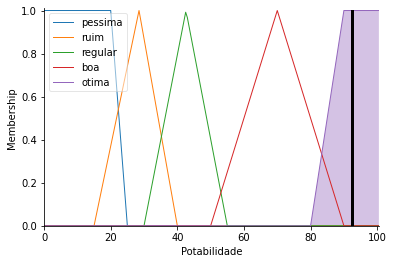

In [ ]:
#Defuzificação
simulador_de_potabilidade.input['PH'] = 7
simulador_de_potabilidade.input['Coliformes'] = 0
simulador_de_potabilidade.input['% de Saturação de Oxigênio Dissolvido'] = 100
simulador_de_potabilidade.input['Variação da temperatura'] = 0

simulador_de_potabilidade.compute()
print("Qualidade:",round(simulador_de_potabilidade.output['Potabilidade'],2), "\n")

pota.view(sim=simulador_de_potabilidade)
plt.show()